<a href="https://colab.research.google.com/github/kxmohelo/Language-Identification/blob/main/Language_Detection_Hackathon_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Packages
Import all the python libraries that we will use in the notebook

In [167]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for data preparation
import string
import math
import nltk
import re
import csv
import urllib

from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.corpus import stopwords
import plotly.figure_factory as ff
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords

# Libraries for model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.sparse
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# set plot style
sns.set()

#Mute warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 2. Loading the data

In [168]:
df = pd.read_csv('train_set.csv')

## 3. Exploratory Data Analysis (EDA)

In [169]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [170]:
df.shape

(33000, 2)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [172]:
df.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [173]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32995    False
32996     True
32997    False
32998    False
32999    False
Length: 33000, dtype: bool

Text(0.5, 0, 'Language')

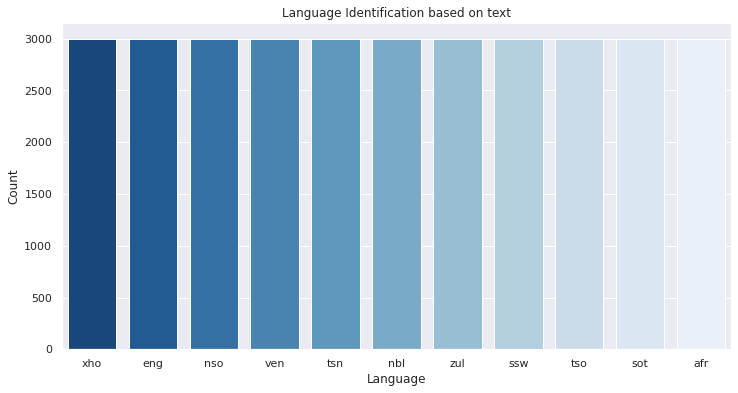

In [174]:
plt.figure (figsize= (12,6))
language_distribution = pd.DataFrame(list(df.lang_id.value_counts()),
                          index= df.lang_id.unique(),
                          columns=['Count'])
sns.set()
sns.barplot(x=language_distribution.index, y=language_distribution.Count, 
           palette="Blues_r")
plt.title('Language Identification based on text')
plt.xlabel('Language')

## Text Cleaning

### Clean text column

In [175]:
# Define function to clean text

def clean_text(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+','web-url',text) # Removing hyperlinks
    text = re.sub(r' +',' ',text) # Removing extra whitespaces
    text.lower()
    return text

  # pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
  # subs_url = r'url-web'
  # df['text'] = df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [176]:
# Define function that cleans punctuation
def clean_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [177]:
# clean df text
df.text = df.text.apply(clean_text)

# clean text punctuation
df.text = df.text.apply(clean_punctuation)

In [178]:
df.text[100]

'u anganelana na sisiteme dza nivho sa tsumbo ndivho ya ngwaniwapo i shumiswa yo angana na thekhinolodzhi ya tshizwinozwino ya bayothekhinolodzhi kha zwa mishonga na dziwe sekhitha kha u engedzedza tshiimo tsha vhubveledzi'

In [179]:
# create a copy of the df
df_copy = df.copy()

#### Tokenize

In [180]:
tokeniser = TreebankWordTokenizer()
df_copy['tokens'] = df_copy.text.apply(tokeniser.tokenize)

#### Stemming

In [181]:
stemmer = SnowballStemmer('english')
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [182]:
df_copy['stem'] = df_copy.tokens.apply(df_stemmer, args=(stemmer, ))

In [183]:
for i, t in enumerate(df_copy.iloc[8702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[8702]['stem'][i]))

izilumkiso           --> izilumkiso
ezibhalwe            --> ezibhalw  
phantsi              --> phantsi   
kwimeko              --> kwimeko   
apho                 --> apho      
imo                  --> imo       
yokuziphatha         --> yokuziphatha
kakubi               --> kakubi    
engokuxhalasileyo    --> engokuxhalasileyo
igunyazisa           --> igunyazisa
ngokunikwa           --> ngokunikwa
kwamacebo            --> kwamacebo 
ngezilumkiso         --> ngezilumkiso
ezibhalwe            --> ezibhalw  
phantsi              --> phantsi   
umphathi             --> umphathi  
wabaqeshwa           --> wabaqeshwa
unokunika            --> unokunika 
isilumkiso           --> isilumkiso
esibhalwe            --> esibhalw  
phantsi              --> phantsi   


In [184]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Lemmatization

In [185]:
lemmatizer = WordNetLemmatizer()
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [186]:
df_copy['lemma'] = df_copy.tokens.apply(df_lemma, args=(lemmatizer, ))

In [187]:
df_copy.head()

,lang_id,text,tokens,stem,lemma
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, provinc, of, kwazulunat, depart, of, tra...","[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [188]:
def combine(df):
    df['lemma'] = [' '.join(map(str, l)) for l in df['lemma']]
    return df

In [189]:
df2 = combine(df_copy)
df2 = df2.drop(['tokens', 'stem'], axis=1)
df2.head()
df = df2

In [190]:
X = df["text"]
y = df["lang_id"]

In [191]:
X.shape

(33000,)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [194]:
vect = TfidfVectorizer()
vect.fit_transform(X_train)

<29700x136038 sparse matrix of type '<class 'numpy.float64'>'
	with 833314 stored elements in Compressed Sparse Row format>

In [195]:
from sklearn.svm import LinearSVC

In [196]:
svc = LinearSVC()

In [197]:
svc.fit(vect.transform(X_train), y_train)
y_pred = svc.predict(vect.transform(X_test))

In [198]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       1.00      0.99      1.00       327
         nso       1.00      0.99      1.00       322
         sot       1.00      1.00      1.00       307
         ssw       0.99      1.00      0.99       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.99      1.00      1.00       313
         zul       0.99      0.99      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [199]:
df_test = pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [200]:
df_test['text'] = df_test['text'].str.lower()

In [201]:
X = df_test['text']

In [202]:
X.shape

(5682,)

In [203]:
pred = svc.predict(vect.transform(X))

In [204]:
pred.shape

(5682,)

In [205]:
df = pd.DataFrame(data=df_test['index'], columns=['index'])
df.insert(1, 'lang_id', pred, allow_duplicates=False)

df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [207]:
pred_df.to_csv(path_or_buf='submit.csv', index=False)